In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

In [2]:
# load the medical_clean.csv dataset
df = pd.read_csv('medical_clean.csv')

#  basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()


Dataset shape: (10000, 50)

First 5 rows:


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:

# column types and missing values
print("Data types and missing values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
df_info

Data types and missing values:


,Data Type,Non-Null Count,Missing Values,Missing Percentage
CaseOrder,int64,10000,0,0.0
Customer_id,object,10000,0,0.0
Interaction,object,10000,0,0.0
UID,object,10000,0,0.0
City,object,10000,0,0.0
State,object,10000,0,0.0
County,object,10000,0,0.0
Zip,int64,10000,0,0.0
Lat,float64,10000,0,0.0
Lng,float64,10000,0,0.0


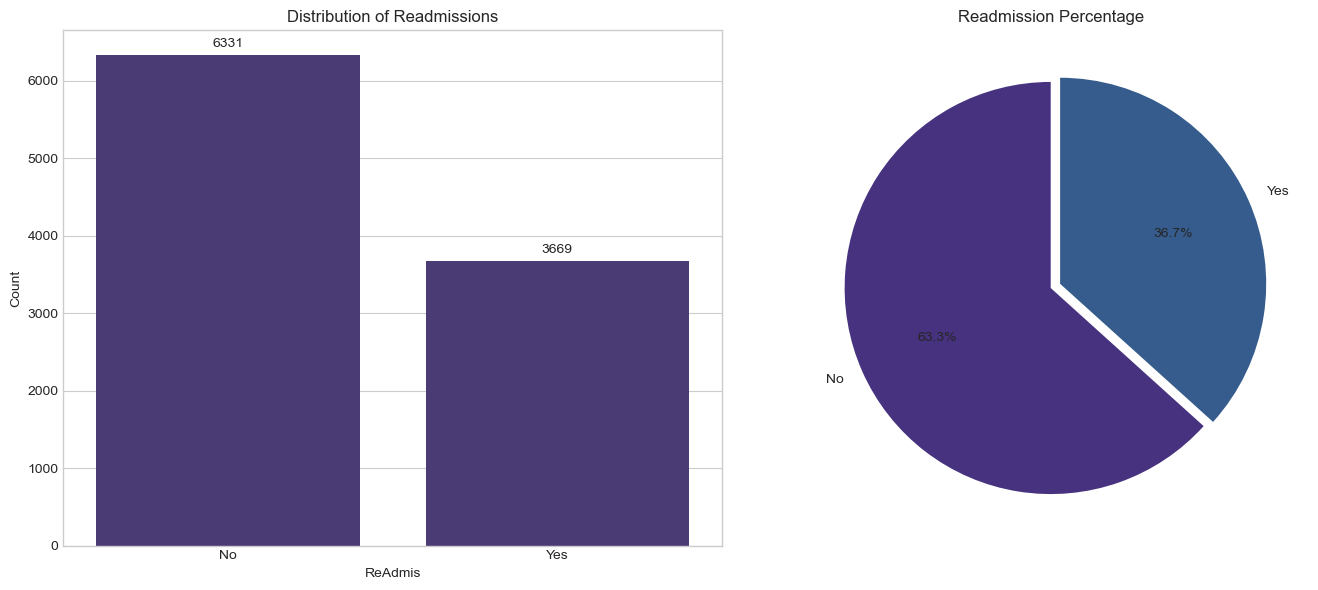


Readmission counts:
ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

Readmission percentages:
ReAdmis
No     63.31
Yes    36.69
Name: proportion, dtype: float64%


In [4]:


#distribution of readmissions
readmission_counts = df['ReAdmis'].value_counts()
readmission_percentage = df['ReAdmis'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# count plot
sns.countplot(x='ReAdmis', data=df, ax=ax[0])
ax[0].set_title('Distribution of Readmissions')
ax[0].set_ylabel('Count')
for i, count in enumerate(readmission_counts):
    ax[0].annotate(f"{count}", xy=(i, count + 100), ha='center')

#pie chart
ax[1].pie(readmission_percentage, labels=readmission_percentage.index, 
          autopct='%1.1f%%', startangle=90, explode=[0, 0.05])
ax[1].set_title('Readmission Percentage')

plt.tight_layout()
plt.show()

print(f"\nReadmission counts:\n{readmission_counts}")
print(f"\nReadmission percentages:\n{readmission_percentage.round(2)}%")

In [5]:


#selectiing potential continuous variables for clustering
continuous_vars = ['Income', 'VitD_levels',  
                   'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# summary statistics for continuous variables
print("Summary statistics for continuous variables:")
df[continuous_vars].describe().round(2)

Summary statistics for continuous variables:


,Income,VitD_levels,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,40490.50,17.96,0.40,34.46,5312.17,12934.53
std,28521.15,2.02,0.63,26.31,2180.39,6542.60
min,154.08,9.81,0.00,1.00,1938.31,3125.70
25%,19598.78,16.63,0.00,7.90,3179.37,7986.49
50%,33768.42,17.95,0.00,35.84,5213.95,11573.98
75%,54296.40,19.35,1.00,61.16,7459.70,15626.49
max,207249.10,26.39,5.00,71.98,9180.73,30566.07


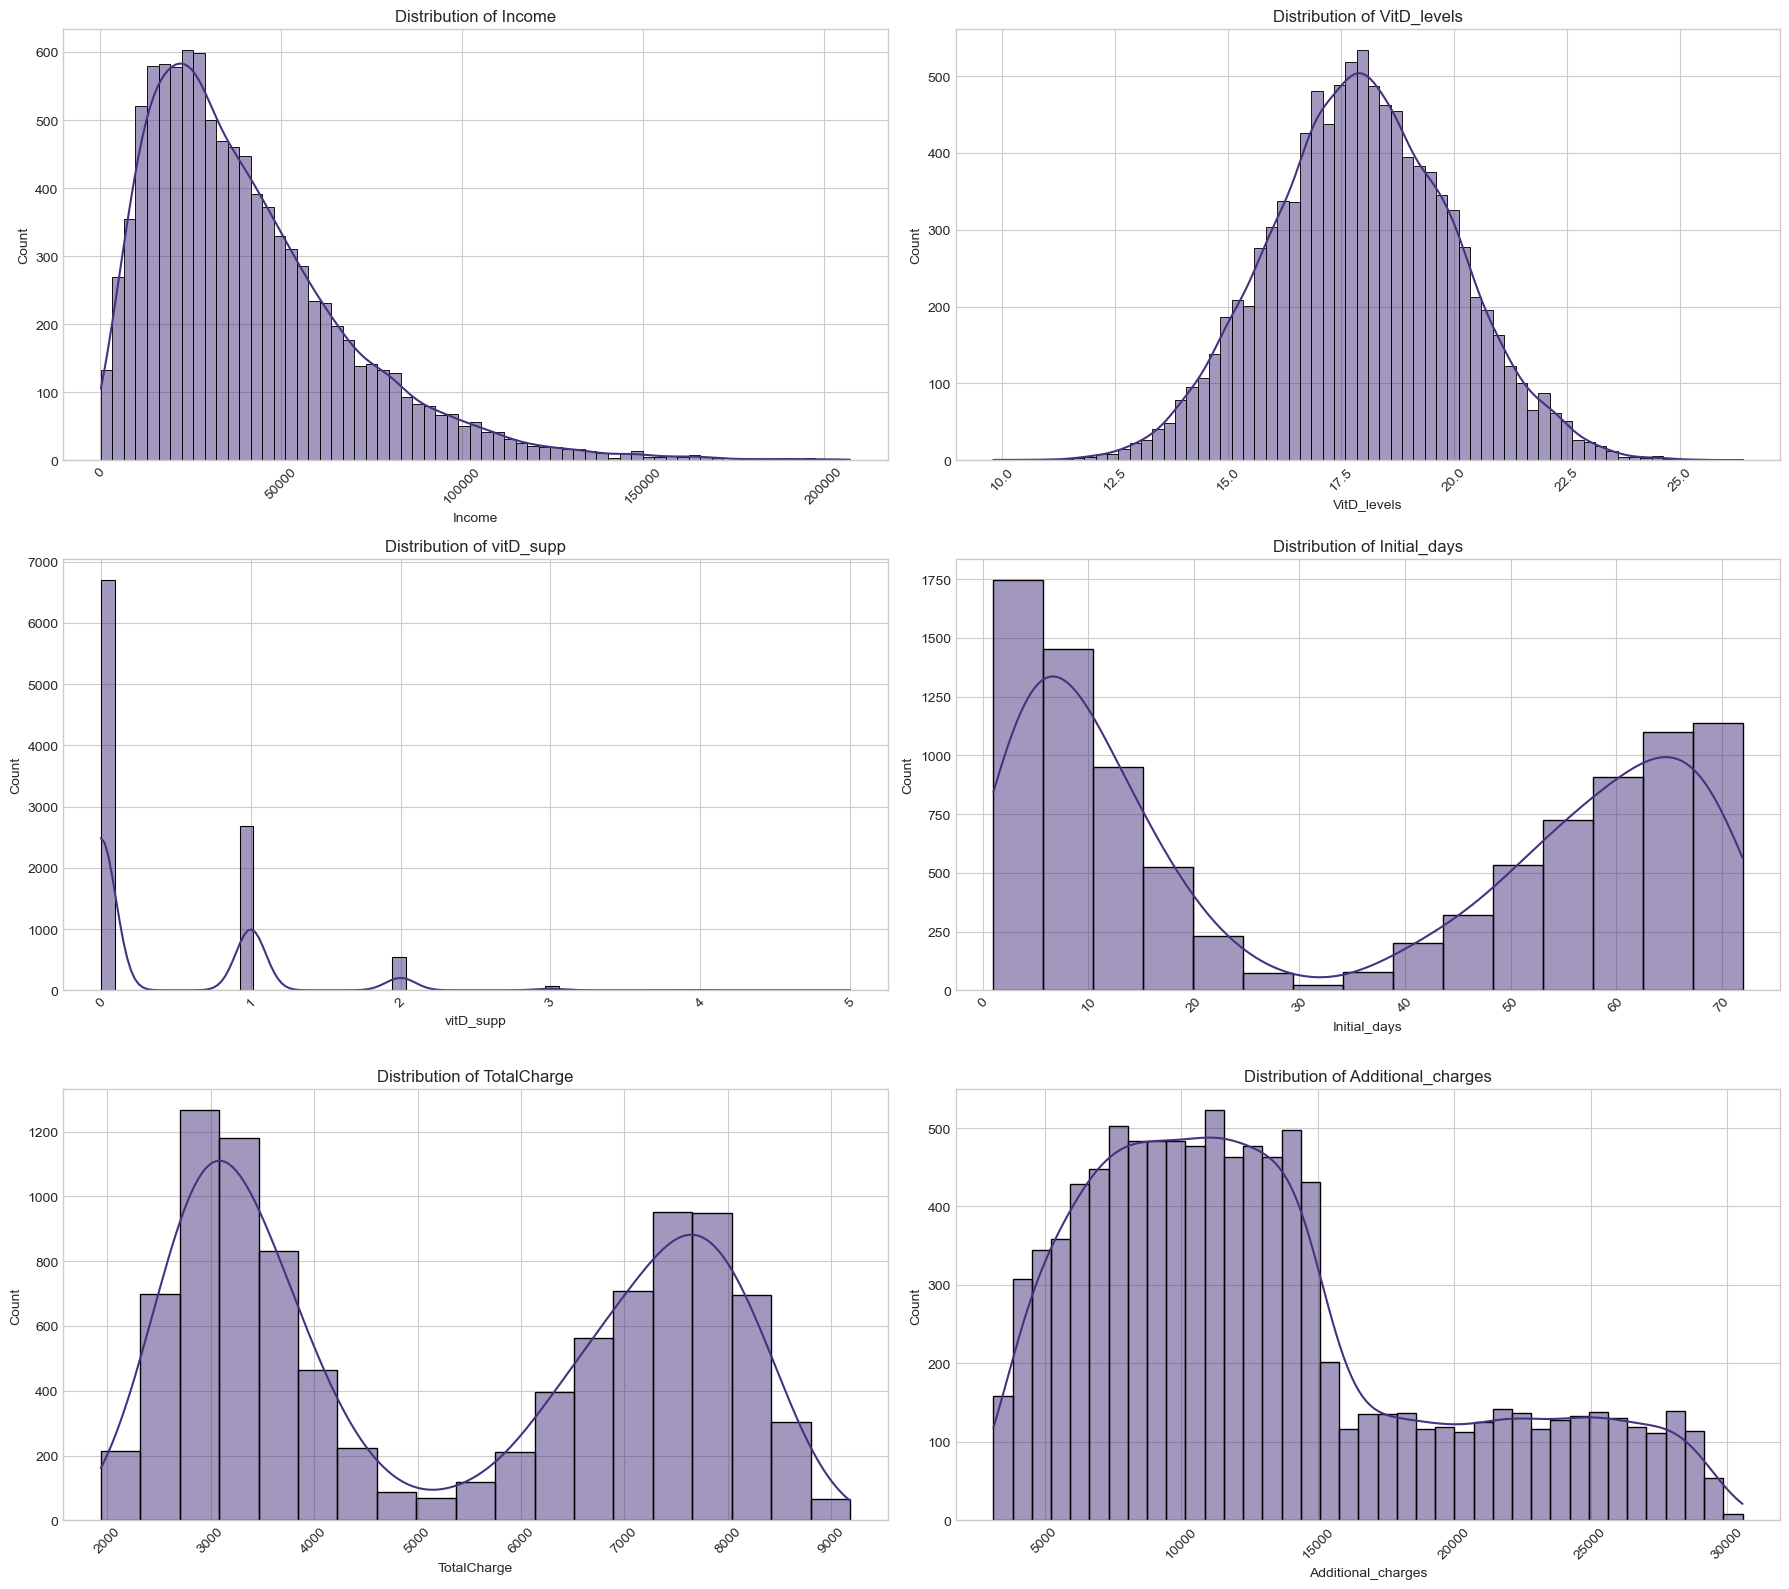

In [6]:
# setting up histograms for each continuous variable
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

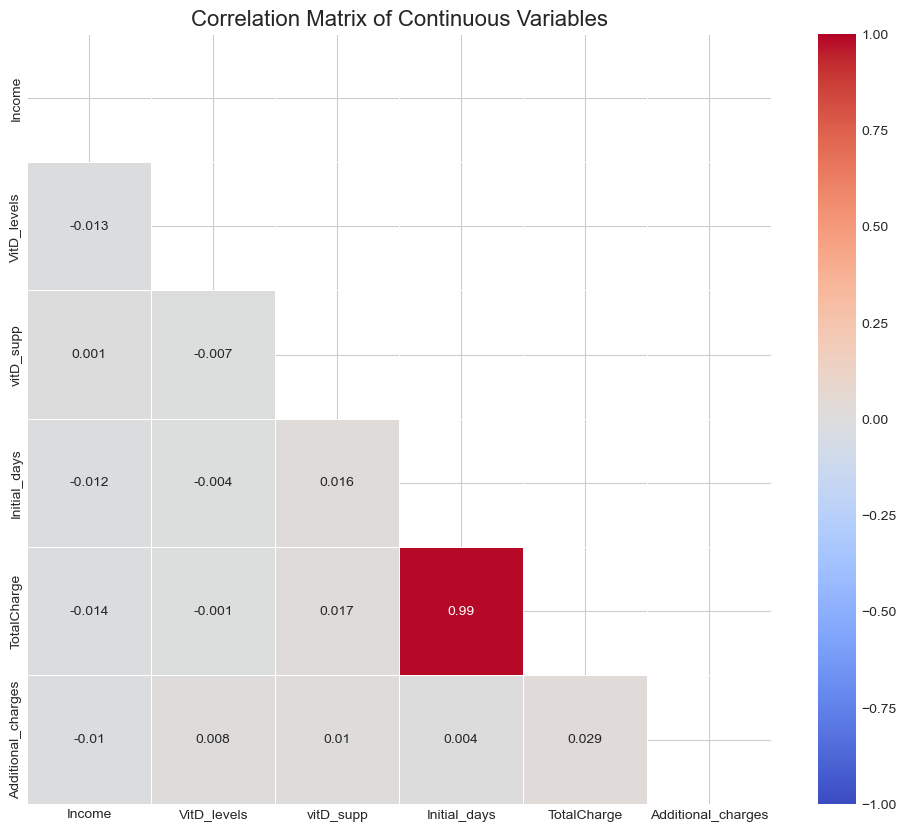

Top 5 strongest variable correlations:
Initial_days and TotalCharge: 0.988
TotalCharge and Additional_charges: 0.029
vitD_supp and TotalCharge: 0.017
vitD_supp and Initial_days: 0.016
Income and TotalCharge: 0.014


In [7]:


# correlation matrix
corr_matrix = df[continuous_vars].corr().round(3)

#heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Variables', fontsize=16)
plt.show()

#strongest correlations
print("Top 5 strongest variable correlations:")
corr_pairs = []
for i, var1 in enumerate(continuous_vars):
    for j, var2 in enumerate(continuous_vars):
        if i < j:  # Only use upper triangle
            corr_pairs.append((var1, var2, abs(corr_matrix.loc[var1, var2])))

# Sorting by absolute correlation
corr_pairs.sort(key=lambda x: x[2], reverse=True)
for var1, var2, corr in corr_pairs[:5]:
    print(f"{var1} and {var2}: {corr:.3f}")

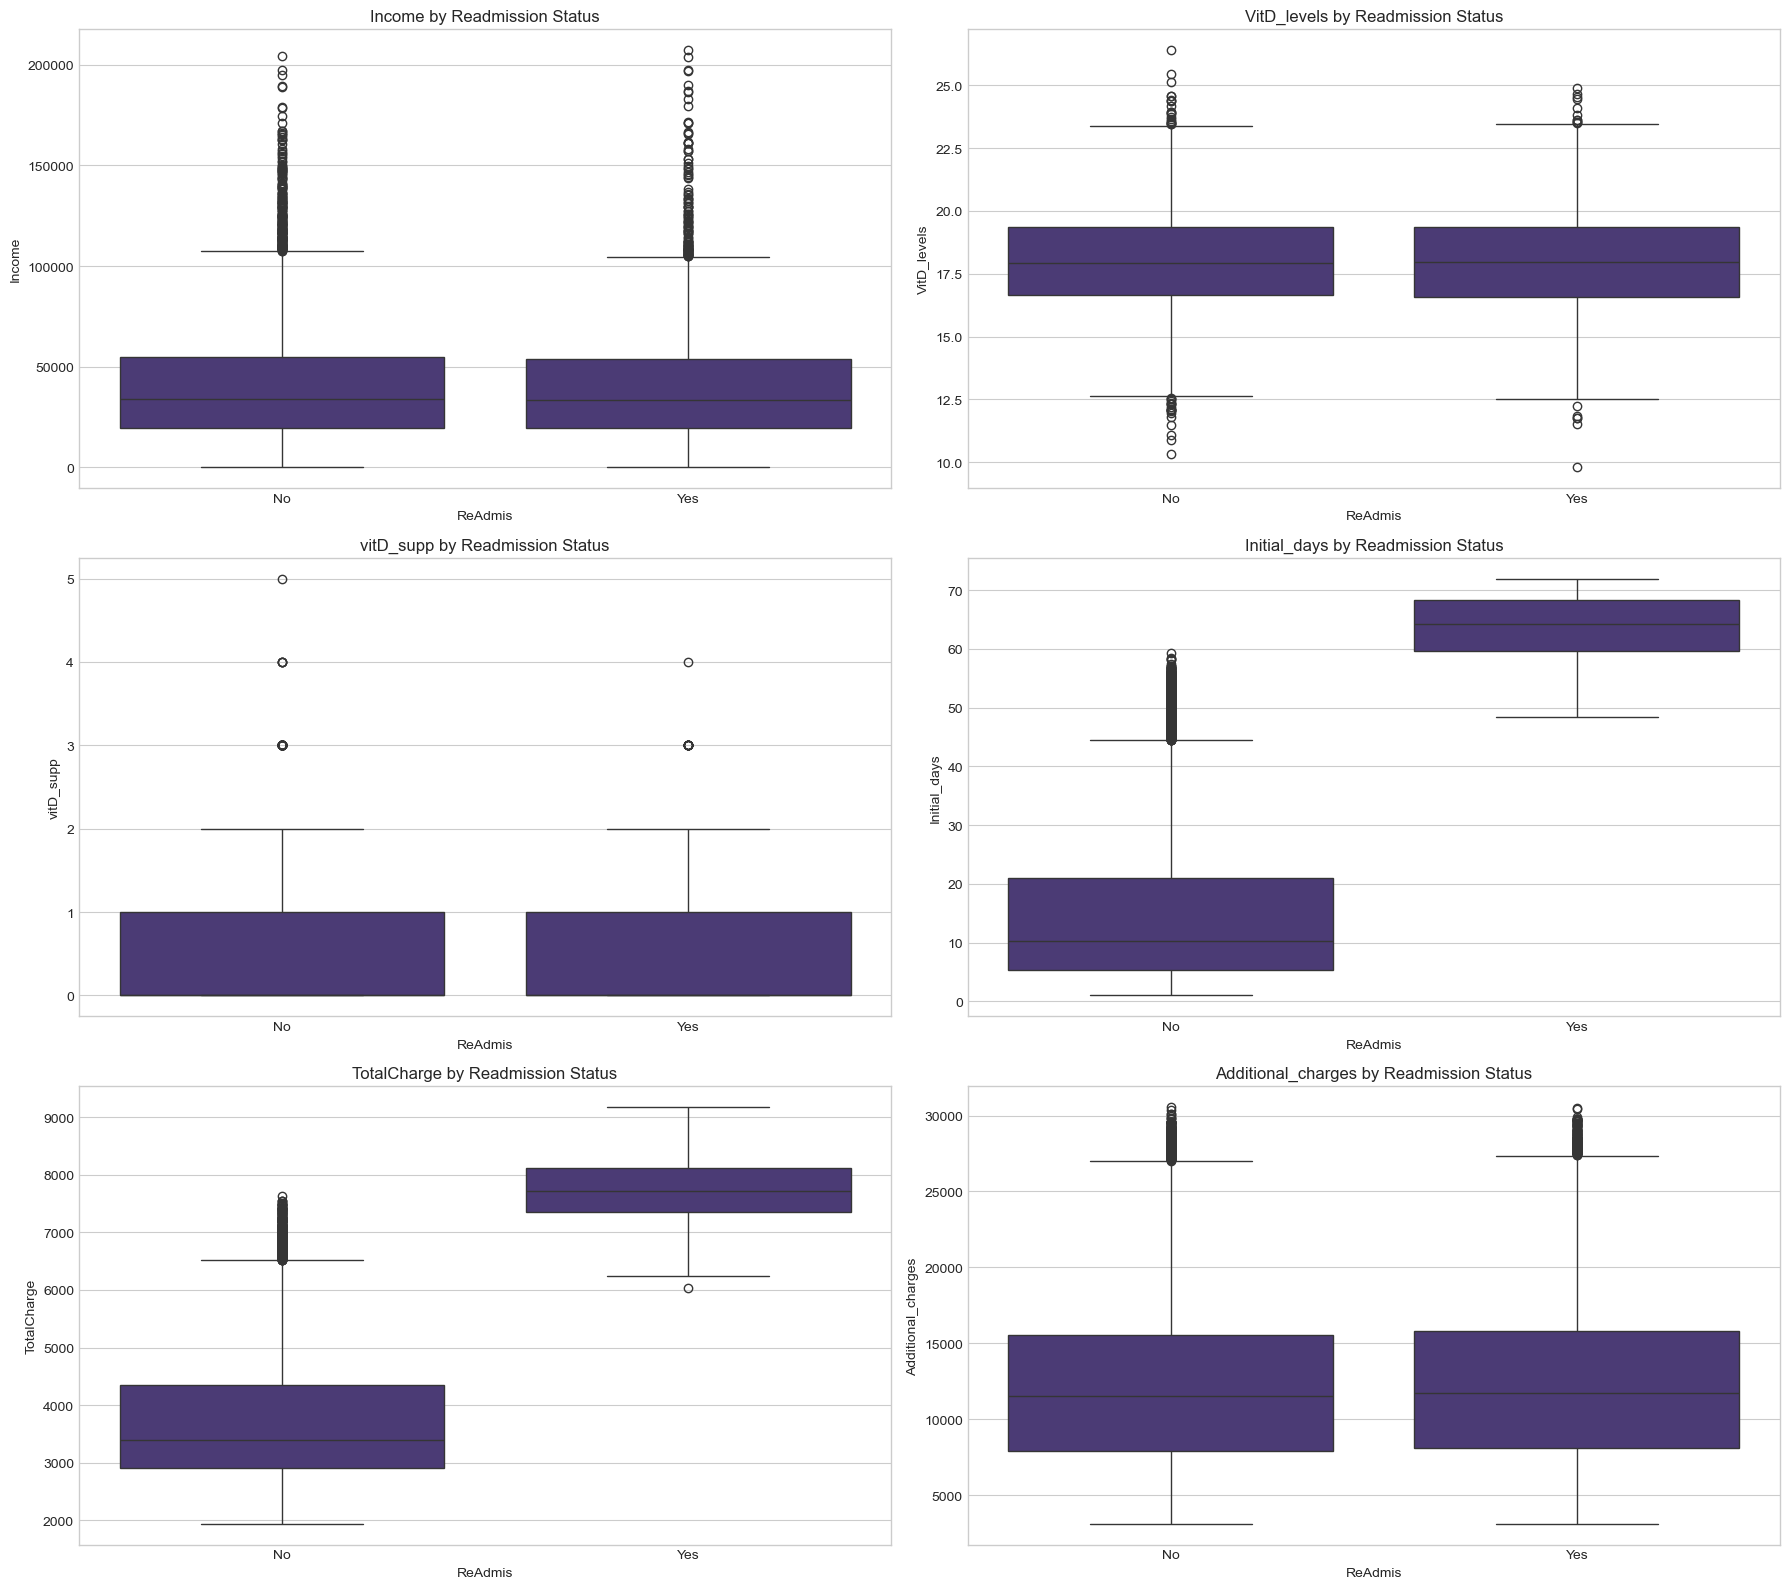

Mean values by readmission status:


,Income,VitD_levels,vitD_supp,Initial_days,TotalCharge,Additional_charges
ReAdmis,,,,,,
No,40740.26,17.96,0.39,17.41,3911.77,12866.70
Yes,40059.52,17.98,0.41,63.86,7728.62,13051.58


In [8]:
#comparing the distribution of continuous variables by readmission statuss
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.boxplot(x='ReAdmis', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} by Readmission Status')


plt.tight_layout()
plt.show()


# mean values for readmitted vs not readmitted
readmission_means = df.groupby('ReAdmis')[continuous_vars].mean().round(2)
print("Mean values by readmission status:")
readmission_means



In [9]:
#looking fro missing values in the selected variables
print("Missing values in selected variables:")
df[continuous_vars].isnull().sum()

# creating function to identify outliers using IQR method
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

#lookingfor outliers in each continuous variable
for var in continuous_vars:
    outliers = get_outliers(df, var)
    print(f"{var}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")
    

Missing values in selected variables:
Income: 326 outliers (3.26%)
VitD_levels: 60 outliers (0.60%)
vitD_supp: 70 outliers (0.70%)
Initial_days: 0 outliers (0.00%)
TotalCharge: 0 outliers (0.00%)
Additional_charges: 424 outliers (4.24%)


In [10]:

# choosing variables baised on analysis for clustering
# remove total charge due to very high correlation with Initial_days
selected_columns = [ 'VitD_levels', 
                   'Initial_days', 'Additional_charges']

# extracting the features for clustering
X = df[selected_columns].copy()

# display the selected dataset
print(f"Selected dataset shape: {X.shape}")
X.head()


Selected dataset shape: (10000, 3)


,VitD_levels,Initial_days,Additional_charges
0,19.141466,10.585770,17939.403420
1,18.940352,15.129562,17612.998120
2,18.057507,4.772177,17505.192460
3,16.576858,1.714879,12993.437350
4,17.439069,1.254807,3716.525786


In [11]:

# standardize the variables (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# convert back to df for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Summary of standardized data:")
X_scaled_df.describe().round(3)


Summary of standardized data:


,VitD_levels,Initial_days,Additional_charges
count,10000.000,10000.000,10000.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-4.044,-1.272,-1.499
25%,-0.663,-1.010,-0.756
50%,-0.007,0.052,-0.208
75%,0.686,1.015,0.411
max,4.179,1.426,2.695


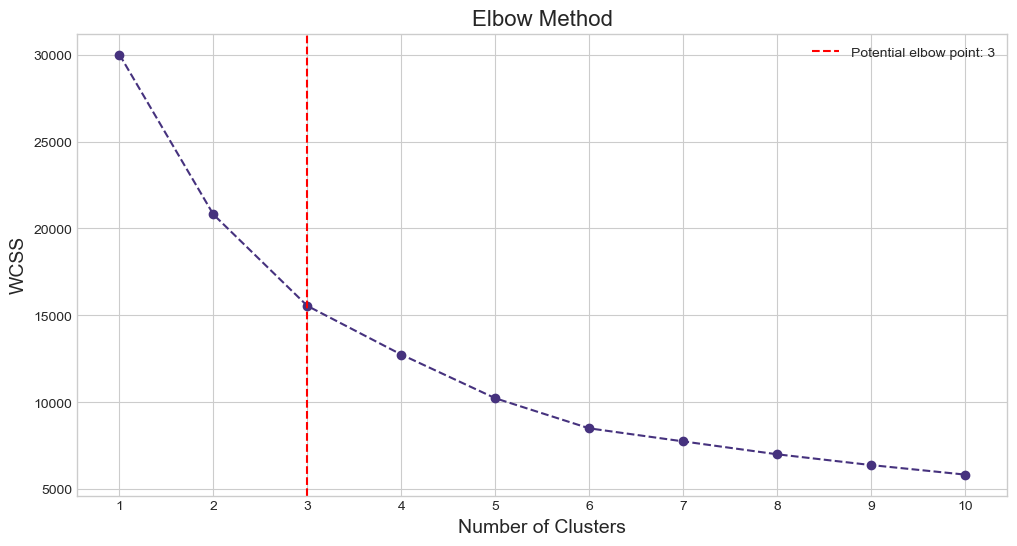

The optimal number of clusters according to the Elbow method appears to be around 3.
Note: Manually identify the point where the curve starts to flatten in the plot above.


In [12]:

# Cal WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# Plot elbow
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
# manual inspection for elbow point
plt.axvline(x=3, color='red', linestyle='--', label='Potential elbow point: 3')
plt.legend()
plt.show()

print("The optimal number of clusters according to the Elbow method appears to be around 3.")
print("Note: Manually identify the point where the curve starts to flatten in the plot above.")


For n_clusters = 2, the silhouette score is 0.3313
For n_clusters = 3, the silhouette score is 0.3563
For n_clusters = 4, the silhouette score is 0.3267
For n_clusters = 5, the silhouette score is 0.3167
For n_clusters = 6, the silhouette score is 0.3432
For n_clusters = 7, the silhouette score is 0.3194
For n_clusters = 8, the silhouette score is 0.2988
For n_clusters = 9, the silhouette score is 0.2999
For n_clusters = 10, the silhouette score is 0.2981


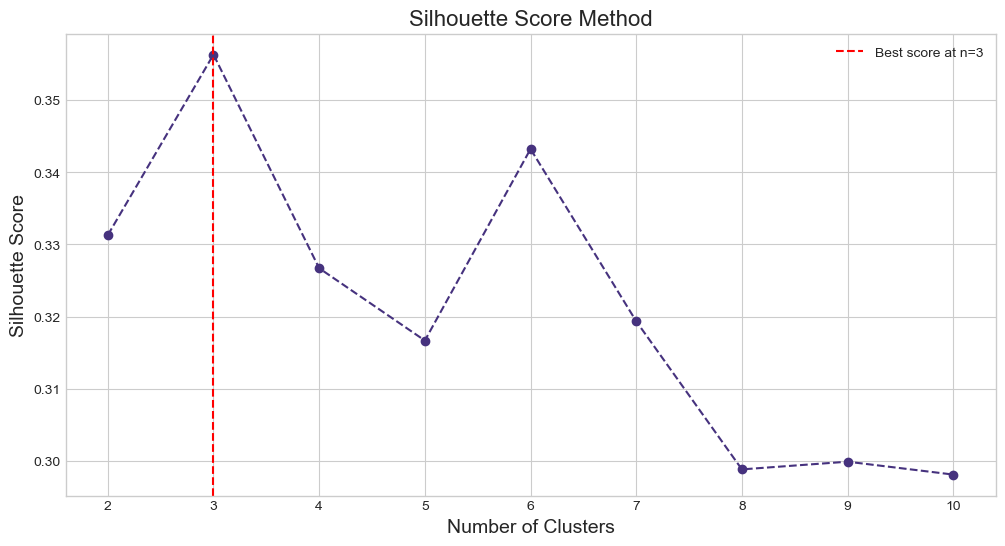

The optimal number of clusters according to the Silhouette method is: 3


In [13]:

#  silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):  # silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg:.4f}")

# plot silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(range(2, 11))
plt.grid(True)

# lookiong for the maximum silhouette score
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
plt.axvline(x=best_n_clusters, color='red', linestyle='--', 
            label=f'Best score at n={best_n_clusters}')
plt.legend()
plt.show()

print(f"The optimal number of clusters according to the Silhouette method is: {best_n_clusters}")

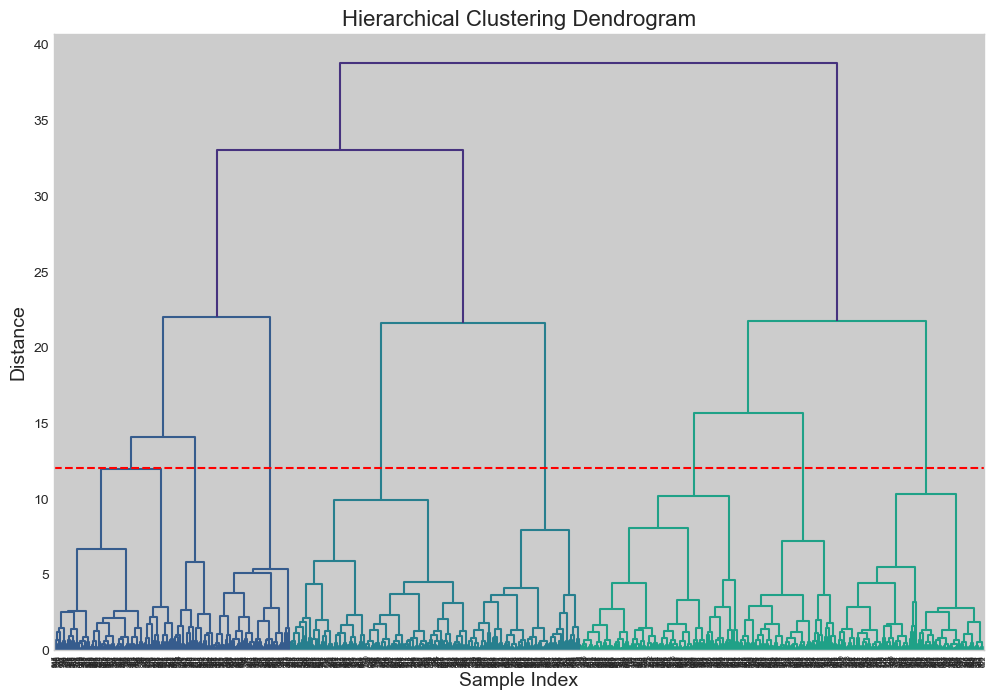

In [14]:
#dendrogram to visualize hierarchical clustering
plt.figure(figsize=(12, 8))
# sample of data 

sample_size = min(1000, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# generate the linkage matrix
linked = linkage(X_sample, method='ward')



# plot the dendrogram
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.axhline(y=12, color='red', linestyle='--')  # Adjusting this threshold based on the dendrogram
plt.show()


In [15]:

#comparing  cluster count

k = 3
results = {}

 # k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# save cluster assignments
df['Cluster'] = cluster_labels

# Calc evaluation metrics
sil_score = silhouette_score(X_scaled, cluster_labels)
db_score = davies_bouldin_score(X_scaled, cluster_labels)
inertia = kmeans.inertia_

# save results
results = {
    'silhouette_score': sil_score,
    'davies_bouldin_score': db_score,
    'inertia': inertia,
    'centers': kmeans.cluster_centers_
}

    
# Calculate readmission rates by cluster
readmission_by_cluster = df.groupby('Cluster')['ReAdmis'].apply(
    lambda x: pd.Series({
        'Total_Patients': len(x),
        'Readmitted': (x == 'Yes').sum(),
        'Readmission_Rate': (x == 'Yes').mean() * 100
    })
).round(2)

print(f"\n--- Results for k={k} ---")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print(f"Inertia: {inertia:.2f}")
print("\nReadmission rates by cluster:")
print(readmission_by_cluster)

# Calculate cluster statistics
cluster_stats = df.groupby('Cluster')[selected_columns].mean().round(2)
print("\nCluster statistics:")
print(cluster_stats)


--- Results for k=3 ---
Silhouette Score: 0.3563
Davies-Bouldin Index: 1.0882
Inertia: 15545.22

Readmission rates by cluster:
Cluster                  
0        Total_Patients      1978.00
         Readmitted           689.00
         Readmission_Rate      34.83
1        Total_Patients      3995.00
         Readmitted             0.00
         Readmission_Rate       0.00
2        Total_Patients      4027.00
         Readmitted          2980.00
         Readmission_Rate      74.00
Name: ReAdmis, dtype: float64

Cluster statistics:
         VitD_levels  Initial_days  Additional_charges
Cluster                                               
0              17.98         33.72            23950.39
1              17.97          9.16            10128.49
2              17.96         59.91            10307.45


In [16]:
#for k=2
kmeans_k2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_k2 = kmeans_k2.fit_predict(X_scaled)
db_score_k2 = davies_bouldin_score(X_scaled, labels_k2)

# For k=3
kmeans_k3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_k3 = kmeans_k3.fit_predict(X_scaled)
db_score_k3 = davies_bouldin_score(X_scaled, labels_k3)

# For k=4
kmeans_k4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels_k4 = kmeans_k4.fit_predict(X_scaled)
db_score_k4 = davies_bouldin_score(X_scaled, labels_k4)
print(f"Davies-Bouldin Index for k=2: {db_score_k2:.4f}")
print(f"Davies-Bouldin Index for k=3: {db_score_k3:.4f}")
print(f"Davies-Bouldin Index for k=4: {db_score_k4:.4f}")


Davies-Bouldin Index for k=2: 1.3480
Davies-Bouldin Index for k=3: 1.0882
Davies-Bouldin Index for k=4: 1.0254


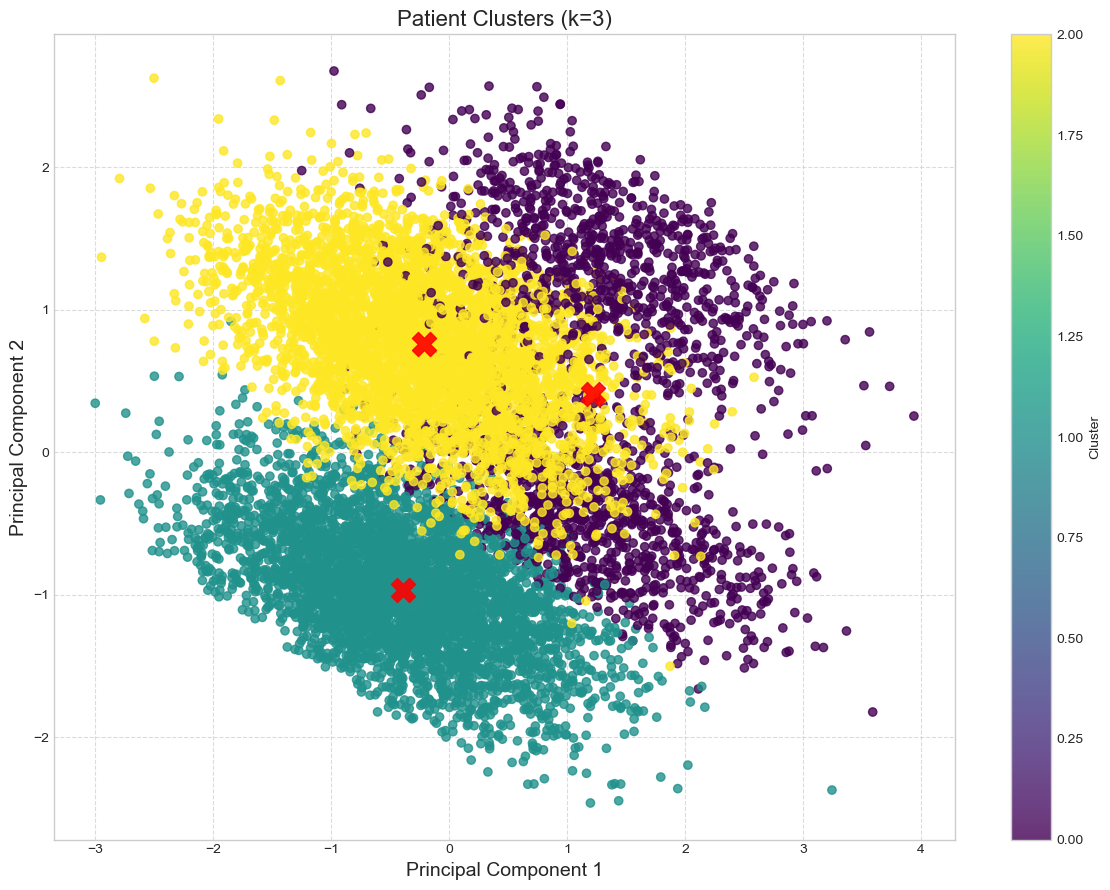

PCA explained variance: [0.33611202 0.33428463]
Total variance explained: 0.6704


In [17]:

# viz the 3 cluster solution using PCA
# apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# get the centroids from our existing k-means model
centers_pca = pca.transform(kmeans.cluster_centers_)

#  plot
plt.figure(figsize=(12, 9))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, alpha=0.9, marker='X')
plt.title(f'Patient Clusters (k=3)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# explain variance captured by PCA
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance):.4f}")




--- Medical Conditions Analysis for k=3 ---
Medical Condition Rates by Cluster (%):
         HighBlood  Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
Cluster                                                                       
0           100.00   21.89       71.94      35.59     26.90           34.02   
1            26.21   19.25       71.26      35.02     27.26           33.99   
2            26.45   19.64       70.13      36.53     27.74           33.30   

         BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  Asthma  
Cluster                                                                    
0           41.56    32.81              40.85               40.50   29.98  
1           40.28    31.54              38.30               41.43   29.54  
2           41.79    32.43              39.81               41.69   27.81  


<Figure size 1400x800 with 0 Axes>

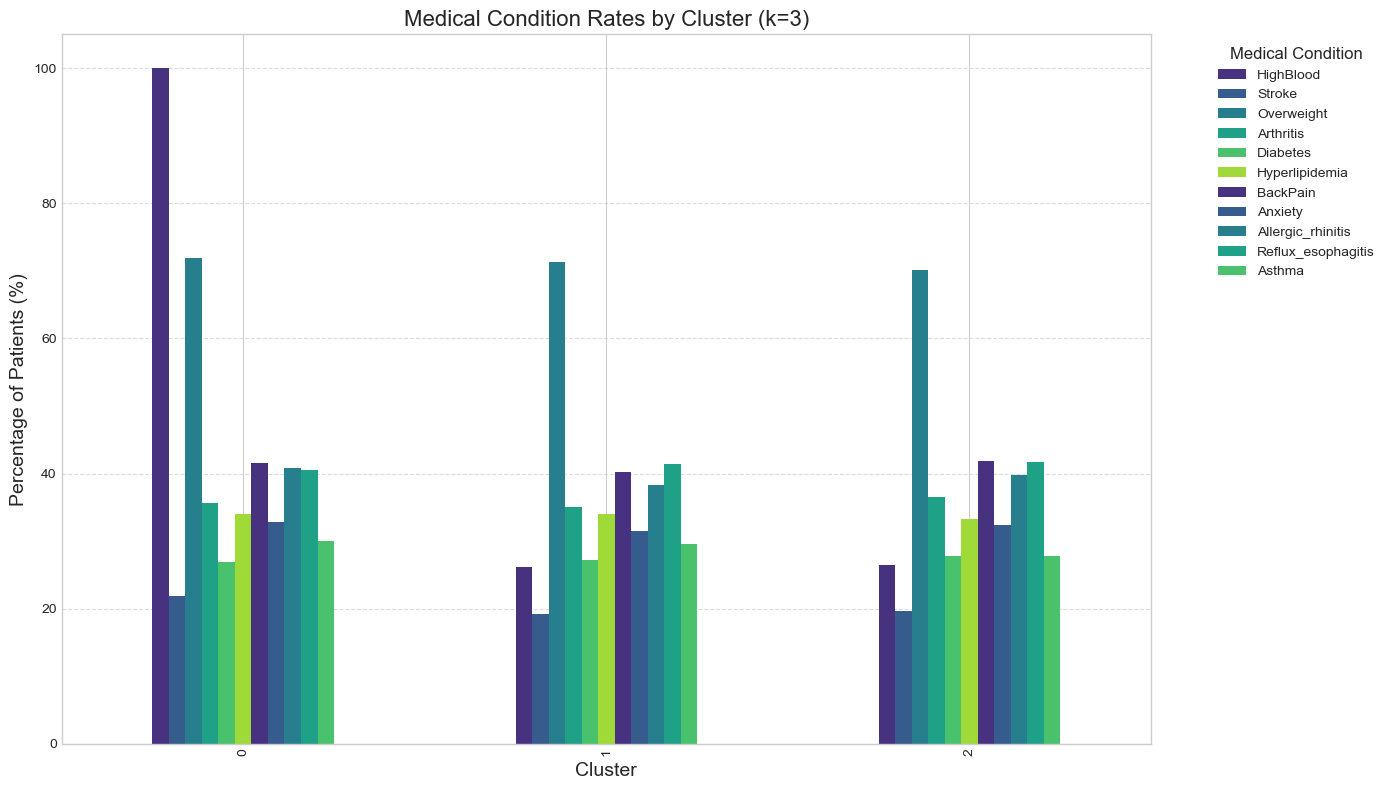

In [18]:

# analyzing medical conditions by cluster for k=3
medical_conditions = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
                      'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
                      'Reflux_esophagitis', 'Asthma']

print(f"\n--- Medical Conditions Analysis for k=3 ---")

condition_rates = pd.DataFrame()
for condition in medical_conditions:
    condition_rates[condition] = df.groupby('Cluster')[condition].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).round(2)

print("Medical Condition Rates by Cluster (%):")
print(condition_rates)

# Visualize medical conditions by cluster
plt.figure(figsize=(14, 8))
condition_rates.plot(kind='bar', figsize=(14, 8))
plt.title(f'Medical Condition Rates by Cluster (k=3)', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Percentage of Patients (%)', fontsize=14)
plt.legend(title='Medical Condition', title_fontsize=12, fontsize=10,
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

    

In [19]:

# Final summary of k=4 clustering solution
print("\n=== Final Summary of Hospital Readmission Clustering Analysis ===")
print(f"Silhouette Score: {results['silhouette_score']:.4f}")
print(f"Davies-Bouldin Index: {results['davies_bouldin_score']:.4f}")
print(f"WCSS/Inertia: {results['inertia']:.2f}")

# calculate the range of readmission rates
readmission_rates = df.groupby('Cluster')['ReAdmis'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
readmission_range = readmission_rates.max() - readmission_rates.min()

print(f"\nRange of Readmission Rates: {readmission_range:.2f}% difference between highest and lowest clusters")

# cluster summary
print("\nCluster Summary:")
for i in range(k):
    cluster_size = (df['Cluster'] == i).sum()
    readmission_rate = readmission_by_cluster.loc[i, 'Readmission_Rate']
    
    avg_initial_days = cluster_stats.loc[i, 'Initial_days']
    
    print(f"Cluster {i}: {cluster_size} patients, {readmission_rate:.1f}% readmission rate")
    print(f"Avg Initial Stay: {avg_initial_days:.1f} days\n")




=== Final Summary of Hospital Readmission Clustering Analysis ===
Silhouette Score: 0.3563
Davies-Bouldin Index: 1.0882
WCSS/Inertia: 15545.22

Range of Readmission Rates: 74.00% difference between highest and lowest clusters

Cluster Summary:
Cluster 0: 1978 patients, 34.8% readmission rate
Avg Initial Stay: 33.7 days

Cluster 1: 3995 patients, 0.0% readmission rate
Avg Initial Stay: 9.2 days

Cluster 2: 4027 patients, 74.0% readmission rate
Avg Initial Stay: 59.9 days



In [20]:

# export the final dataset with cluster assignments
final_df = df.copy()
final_df.to_csv('medical_clean_with_clusters.csv', index=False)
print("Saved enriched dataset with cluster assignments to 'medical_clean_with_clusters.csv'")

# conclusion for report
print("\n=== Conclusion ===")
print("Based on our comprehensive analysis, we selected k=3 as the optimal number of clusters")
print("for this hospital readmission dataset. This selection is supported by multiple factors:")
print("1. The elbow method identifies k=3 as the optimal number of clusters")
print("2. The silhouette analysis confirms k=3 as a well-separated clustering solution")
print("3. The 3-cluster solution reveals clear, interpretable patterns with significant")
print("   differences in readmission rates between clusters")
print("4. The clusters are primarily distinguished by initial hospital stay length,")
print("   vitamin D levels, and additional charges, providing actionable insights")
print("   for targeted interventions to reduce readmissions.")

Saved enriched dataset with cluster assignments to 'medical_clean_with_clusters.csv'

=== Conclusion ===
Based on our comprehensive analysis, we selected k=3 as the optimal number of clusters
for this hospital readmission dataset. This selection is supported by multiple factors:
1. The elbow method identifies k=3 as the optimal number of clusters
2. The silhouette analysis confirms k=3 as a well-separated clustering solution
3. The 3-cluster solution reveals clear, interpretable patterns with significant
   differences in readmission rates between clusters
4. The clusters are primarily distinguished by initial hospital stay length,
   vitamin D levels, and additional charges, providing actionable insights
   for targeted interventions to reduce readmissions.
